# Apartat C

Primer fem els imports de les llibreries que farem servir

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
import math 
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm1
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
#%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn.metrics import mean_squared_error

Carreguem el dataset

In [2]:
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',',decimal=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('measurements.csv')
data = dataset.values
dataset.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000,388.000,388.000,376.000,388.000,388.000,388.000,388.000,13.000
mean,19.653,4.912,41.928,21.930,11.358,0.077,0.124,0.082,37.115
std,22.668,1.033,13.599,1.010,6.992,0.267,0.330,0.275,8.587
min,1.300,3.300,14.000,19.000,-5.000,0.000,0.000,0.000,10.000
25%,11.800,4.300,32.750,21.500,7.000,0.000,0.000,0.000,37.600
50%,14.600,4.700,40.500,22.000,10.000,0.000,0.000,0.000,38.000
75%,19.000,5.300,50.000,22.500,16.000,0.000,0.000,0.000,39.000
max,216.100,12.200,90.000,25.500,31.000,1.000,1.000,1.000,45.000


Fem els canvis adients al dataset i el separem entre l'atribut que volem predir i la resta

In [3]:
x = dataset.drop(columns='consume')
y = dataset.filter(['consume'])
print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

del(dataset['refill liters'])#columna que no aporta informació
del(dataset['refill gas'])#columna que no aporta informació
del(dataset['specials'])#columna que no aporta informació

dataset.loc[dataset['gas_type'] == 'E10', "gas_type"] = 1#canviar els booleans que tenen forma de string
dataset.loc[dataset['gas_type'] == 'SP98', "gas_type"] = 0#canviar els booleans que tenen forma de string

dataset['temp_inside']=dataset['temp_inside'].fillna(dataset["temp_inside"].mean())#omplir valors nulls amb la mitjana

dataset['distance']=1/(dataset['distance'])
#creacio de nous atributs i modificació del actuals
dataset['speed']=1/(dataset['speed'])#1/velocitat
dataset['time'] = dataset['distance']/dataset['speed']#1/temps
print(min(dataset['time']))

dataset=(dataset-dataset.mean())/dataset.std()#normalizació

x = dataset.drop(columns='consume')
x=x.values
y = dataset.filter(['consume'])
y=y.values




Dimensionalitat de la BBDD: (388, 12)
Dimensionalitat de les entrades X (388, 11)
Dimensionalitat de l'atribut Y (388, 1)
Per comptar el nombre de valors no existents:
distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64
0.37914691943127965


A continuaciò mirem la correlació dels diferents atributs


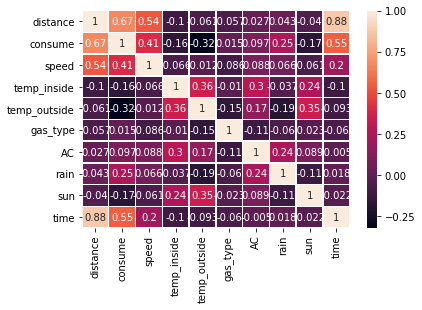

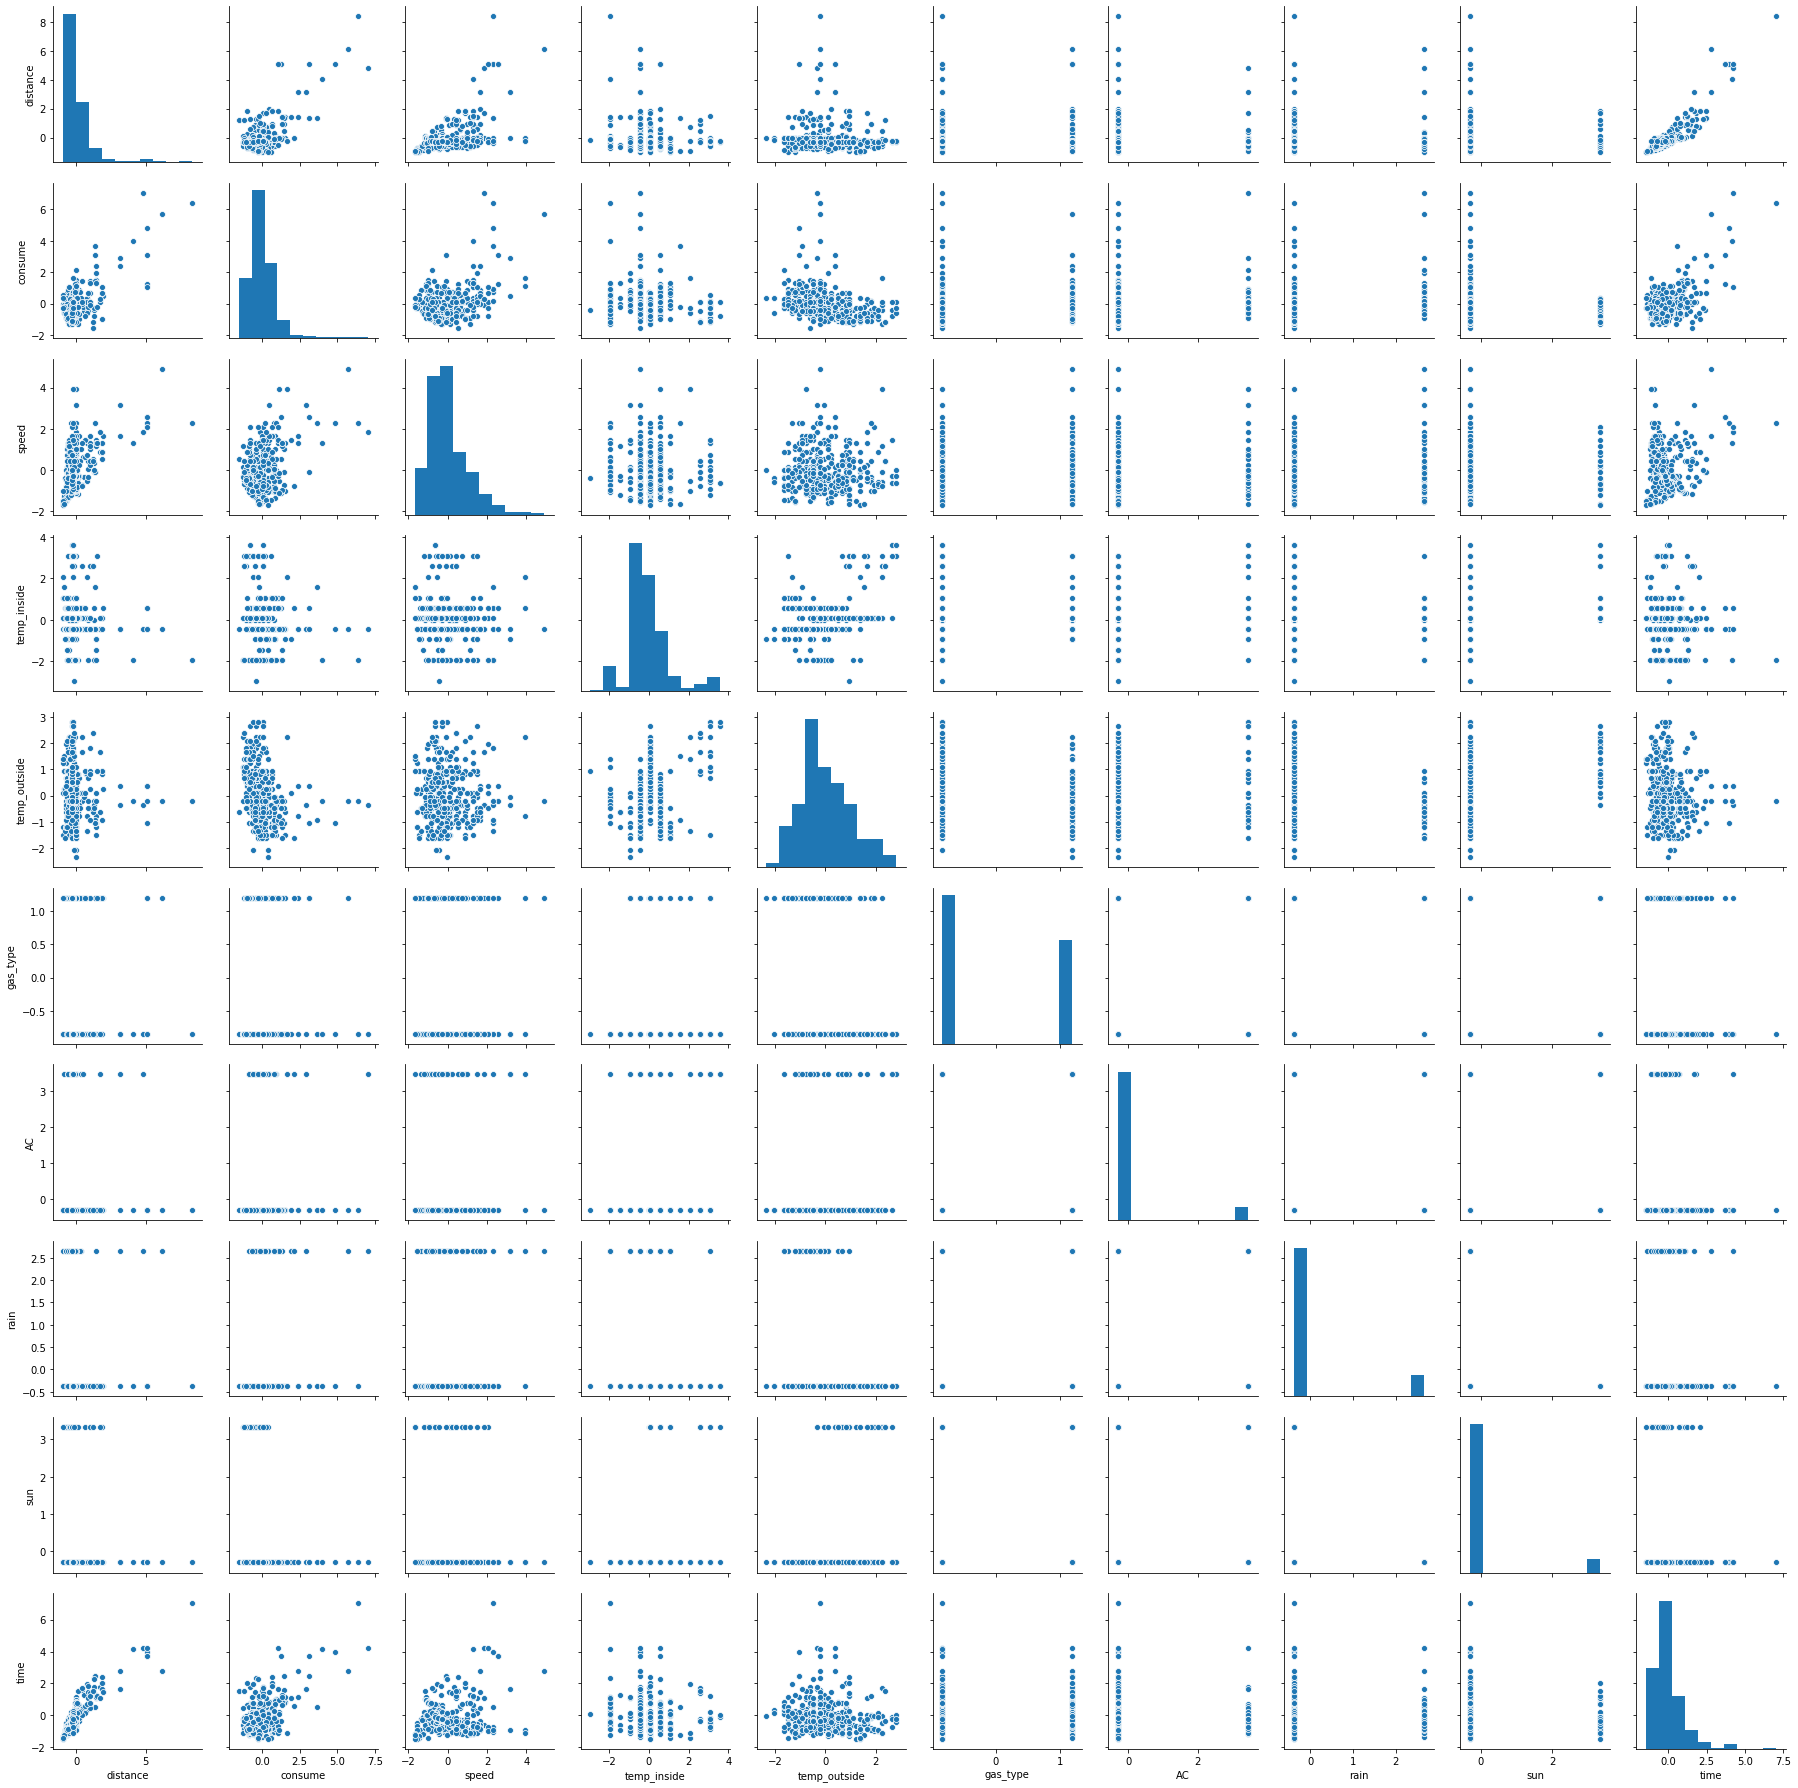

In [4]:
print("A continuaciò mirem la correlació dels diferents atributs")
correlacio = dataset.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)
relacio = sns.pairplot(dataset)


# Apartat B

In [5]:
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

def split_data(x, y, train_ratio=0.8):
    np.random.seed(5)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x, y)


In [6]:
def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression(fit_intercept=True)

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

In [7]:
for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))

Error en atribut 0: 0.707626
R2 score en atribut 0: 0.608770
Error en atribut 1: 1.456864
R2 score en atribut 1: 0.194535
Error en atribut 2: 1.868748
R2 score en atribut 2: -0.033186
Error en atribut 3: 1.809108
R2 score en atribut 3: -0.000212
Error en atribut 4: 1.923092
R2 score en atribut 4: -0.063232
Error en atribut 5: 1.953209
R2 score en atribut 5: -0.079883
Error en atribut 6: 1.829374
R2 score en atribut 6: -0.011417
Error en atribut 7: 1.883535
R2 score en atribut 7: -0.041362
Error en atribut 8: 1.076471
R2 score en atribut 8: 0.404845


Per fer el métode de bacward selection apliquem una regressió que tingui en compte tots els atributs

In [8]:
#primer regressor
train, test = train_test_split(dataset, test_size=0.2,random_state=1)#fem la prova amb una seed que no dona bons resultats al test
dta=dataset.values
est = sm1.ols(formula='consume ~ distance+speed+temp_inside+temp_outside+gas_type+AC+rain+sun+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     57.52
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           3.66e-60
Time:                        18:34:11   Log-Likelihood:                -298.53
No. Observations:                 310   AIC:                             617.1
Df Residuals:                     300   BIC:                             654.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0284      0.037      0.774   

Fem una visualització amb els 2 millors atributs

<IPython.core.display.Javascript object>


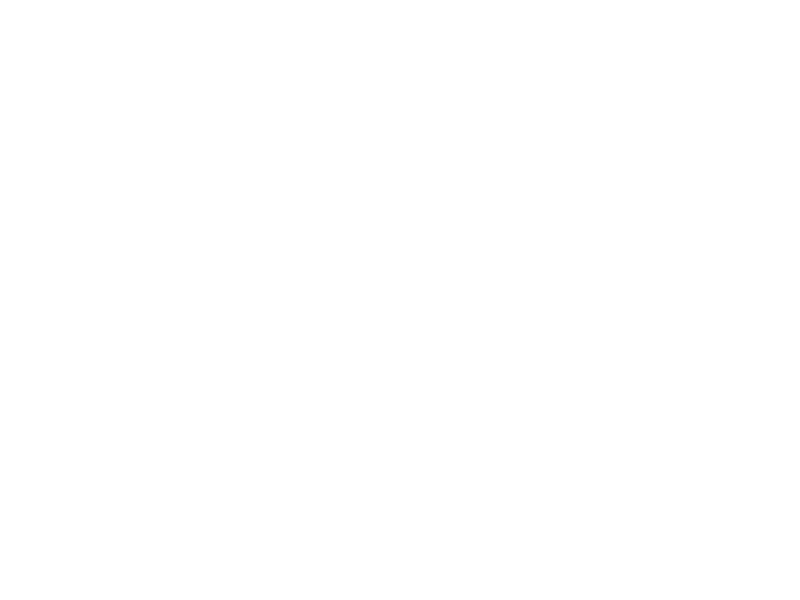

In [9]:
%matplotlib notebook
malla = (range(30) + 0 * np.ones(30)) / 10 
malla_x1 =  malla * (5) - (1)/2 + 0
malla_x2 =  malla * (5 - 1)/2 + 0
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)
zplot =model.params[0] + xplot * model.params[1] + yplot *model.params[4]

plt3d = plt.figure('Plano Regresor', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(dataset['distance'],dataset['temp_outside'],dataset['consume'])


Com l'atribut amb major p-value és $\textbf{temp_inside}$ el treiem

In [10]:
est = sm1.ols(formula='consume ~ distance+speed+temp_outside+gas_type+AC+rain+sun+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     64.84
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           5.00e-61
Time:                        18:34:11   Log-Likelihood:                -298.67
No. Observations:                 310   AIC:                             615.3
Df Residuals:                     301   BIC:                             649.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0287      0.037      0.784   

Com l'atribut amb major p-value és l'intercept el treiem

In [11]:
est = sm1.ols(formula='consume ~ distance+speed+temp_outside+gas_type+AC+rain+sun+time-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.632
Model:                            OLS   Adj. R-squared (uncentered):              0.623
Method:                 Least Squares   F-statistic:                              64.92
Date:                Thu, 25 Nov 2021   Prob (F-statistic):                    3.72e-61
Time:                        18:34:11   Log-Likelihood:                         -298.98
No. Observations:                 310   AIC:                                      614.0
Df Residuals:                     302   BIC:                                      643.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Com l'atribut amb major p-value és $\textbf{gas_type}$ el treiem

In [12]:
est = sm1.ols(formula='consume ~ distance+speed+temp_outside+AC+rain+sun+time-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.631
Model:                            OLS   Adj. R-squared (uncentered):              0.623
Method:                 Least Squares   F-statistic:                              74.15
Date:                Thu, 25 Nov 2021   Prob (F-statistic):                    5.97e-62
Time:                        18:34:11   Log-Likelihood:                         -299.36
No. Observations:                 310   AIC:                                      612.7
Df Residuals:                     303   BIC:                                      638.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Com l'atribut amb major p-value és $\textbf{sun}$ el treiem

In [13]:
est = sm1.ols(formula='consume ~ distance+speed+temp_outside+AC+rain+time-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.630
Model:                            OLS   Adj. R-squared (uncentered):              0.623
Method:                 Least Squares   F-statistic:                              86.45
Date:                Thu, 25 Nov 2021   Prob (F-statistic):                    8.95e-63
Time:                        18:34:12   Log-Likelihood:                         -299.75
No. Observations:                 310   AIC:                                      611.5
Df Residuals:                     304   BIC:                                      633.9
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Com l'atribut amb major p-value és $\textbf{speed}$ el treiem

In [14]:
est = sm1.ols(formula='consume ~ distance+temp_outside+AC+rain+time-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.625
Model:                            OLS   Adj. R-squared (uncentered):              0.619
Method:                 Least Squares   F-statistic:                              101.9
Date:                Thu, 25 Nov 2021   Prob (F-statistic):                    6.58e-63
Time:                        18:34:12   Log-Likelihood:                         -301.86
No. Observations:                 310   AIC:                                      613.7
Df Residuals:                     305   BIC:                                      632.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Per visualitzar el model final, gràfiquem el pla regressor dels atributs amb menor p-value

<IPython.core.display.Javascript object>


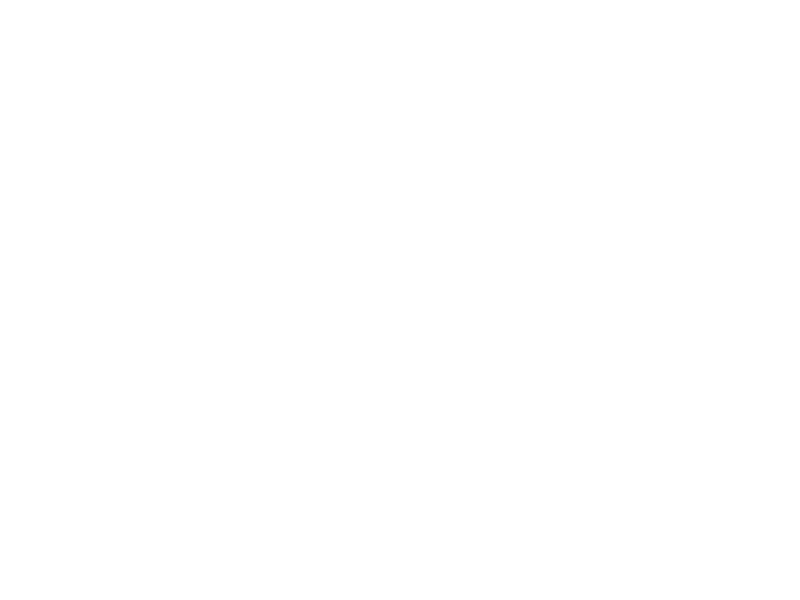

In [15]:
%matplotlib notebook
malla = (range(30) + 0 * np.ones(30)) / 10 
malla_x1 =  malla * (5) - (1)/2 + 0
malla_x2 =  malla * (5 - 1)/2 + 0
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)
zplot =xplot * model.params[0] + yplot *model.params[1]

plt3d = plt.figure('Plano Regresor', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(dataset['distance'],dataset['temp_outside'],dataset['consume'])


Tots els p-values són menors que 0.025, no fem més canvis i per tant hem finalitzat la nostra regressió

Anem a fer backward selection amb altres dades que donen millor test

In [16]:
train, test = train_test_split(dataset, test_size=0.2,random_state=6)

Després de fer backward selection obtenim com a millor model:

In [17]:
est = sm1.ols(formula='consume ~ distance+temp_outside+AC+rain+time-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.495
Model:                            OLS   Adj. R-squared (uncentered):              0.487
Method:                 Least Squares   F-statistic:                              59.80
Date:                Thu, 25 Nov 2021   Prob (F-statistic):                    2.82e-43
Time:                        18:34:12   Log-Likelihood:                         -293.98
No. Observations:                 310   AIC:                                      598.0
Df Residuals:                     305   BIC:                                      616.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

<IPython.core.display.Javascript object>


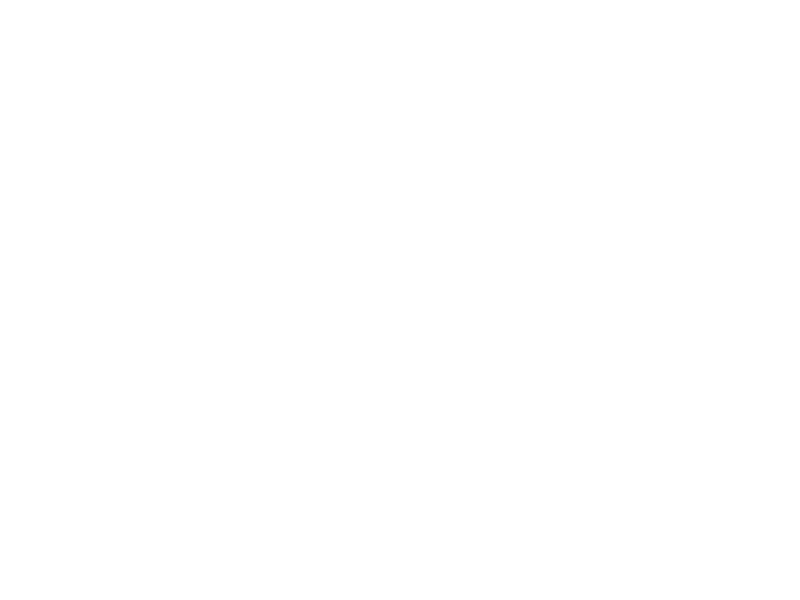

In [18]:
%matplotlib notebook
malla = (range(30) + 0 * np.ones(30)) / 10 
malla_x1 =  malla * (5) - (1)/2 + 0
malla_x2 =  malla * (5 - 1)/2 + 0
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)
zplot =xplot * model.params[0] + yplot *model.params[1]

plt3d = plt.figure('Plano Regresor', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(dataset['distance'],dataset['temp_outside'],dataset['consume'])


També es pot aplicar aquest métode per fer un regressor polinomic, aplicant-ho obtenim:

In [19]:
est = sm1.ols(formula='consume ~  distance+I(temp_outside**2)+temp_outside+I(rain**2)+rain+I(time**2)+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     52.50
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           3.89e-44
Time:                        18:34:12   Log-Likelihood:                -288.73
No. Observations:                 310   AIC:                             591.5
Df Residuals:                     303   BIC:                             617.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1855 

<IPython.core.display.Javascript object>


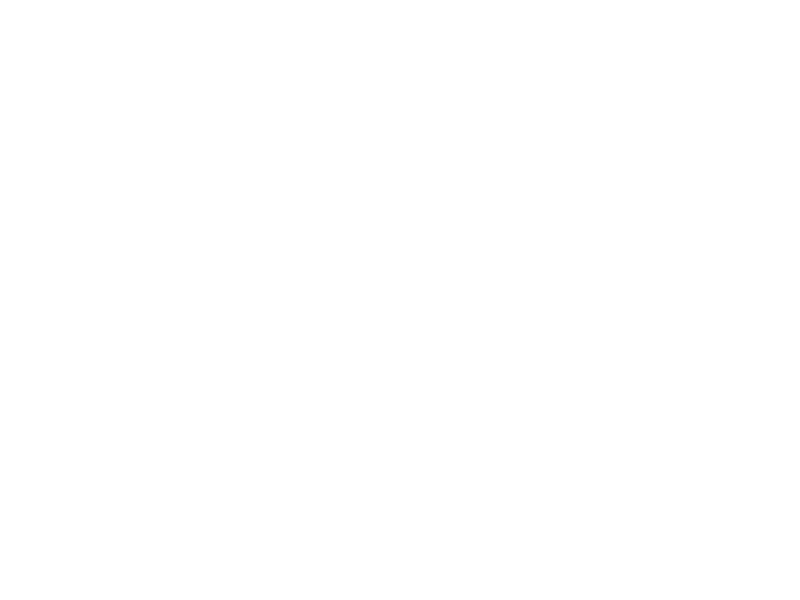

In [20]:
%matplotlib notebook
malla = (range(50) + 0 * np.ones(50)) / 10 
malla_x1 =  malla * (5) - (1)/2 + 0
malla_x2 =  malla * (5 - 1)/2 + 0
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)
zplot =model.params[0]+xplot * model.params[1] + yplot *model.params[3]+ (yplot**2) *model.params[2]

plt3d = plt.figure('Plano Regresor', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(dataset['distance'],dataset['temp_outside'],dataset['consume'])


## Aplicant PCA

In [21]:
dataset_x = dataset.drop(columns='consume')
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(dataset_x)
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)


In [22]:
df = pd.DataFrame(reduced, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
df['consume']=dataset['consume']
df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,consume
0,0.596,-0.060,-0.059,0.064,0.027,0.094,-0.125,0.085
1,0.595,-0.067,-0.053,0.061,0.042,0.112,-0.095,-0.689
2,0.594,-0.081,-0.034,0.056,-0.015,0.120,-0.090,0.569
3,0.596,-0.076,-0.043,0.056,-0.016,0.099,-0.093,-0.980
4,0.598,-0.086,-0.030,0.049,-0.106,0.071,-0.103,-0.399
5,0.603,-0.059,-0.086,0.041,0.063,0.008,0.012,1.440
6,0.600,-0.061,-0.077,0.047,0.076,0.048,-0.008,-0.496
7,0.612,-0.039,-0.118,0.040,0.046,-0.083,-0.004,0.085
8,0.604,-0.014,-0.149,0.056,0.329,0.018,0.049,1.440
9,0.602,-0.047,-0.091,0.054,0.080,0.028,-0.056,0.375


<IPython.core.display.Javascript object>


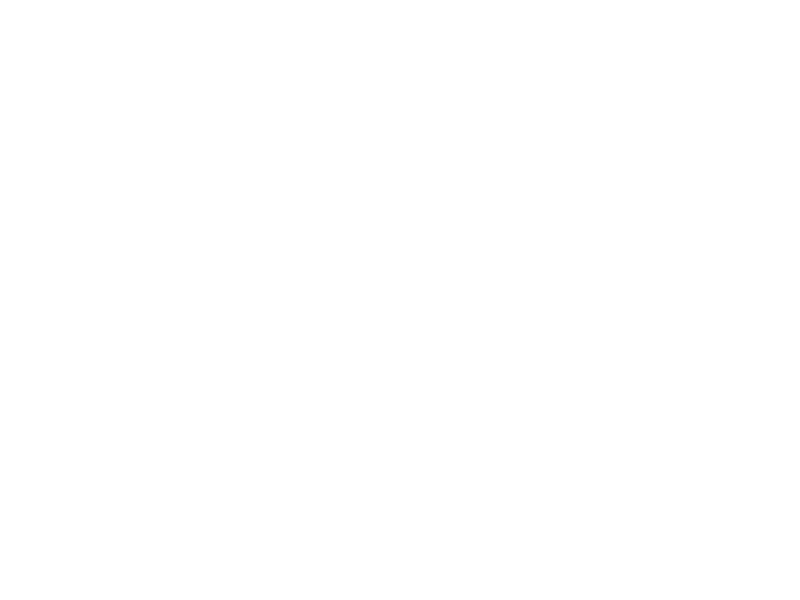

In [23]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio =df.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.25)


Ara podem fer una visualització dels dos millors components del PCA i el consum

<IPython.core.display.Javascript object>


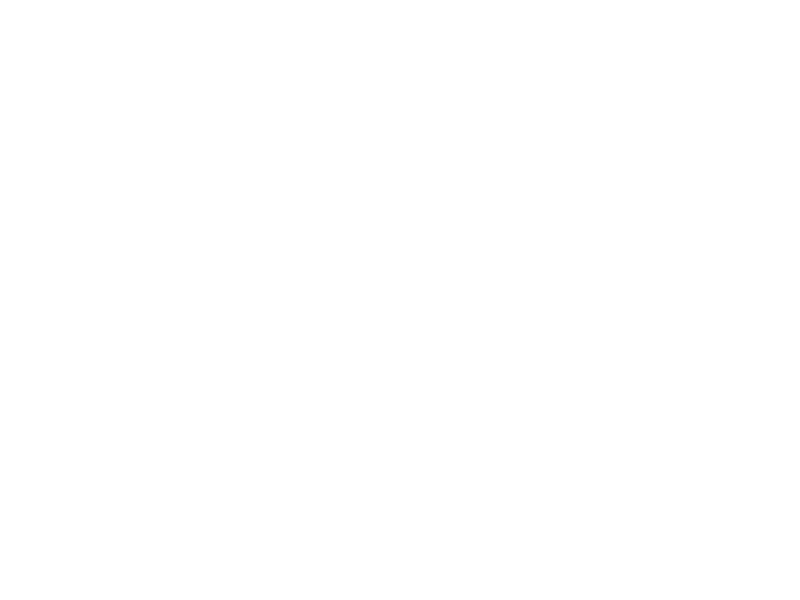

In [24]:
%matplotlib notebook
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_val[:,0]) - min(x_val[:,0]))/2 + min(x_val[:,0])
malla_x2 =  malla * (max(x_val[:,1]) - min(x_val[:,1]))/2 + min(x_val[:,1])
plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).gca(projection='3d')
plt3d.scatter(df['pc2'],df['pc5'],df['consume'])

Observem que semblen punts d'un mateix pla

Fem regressió amb el PCA aplicat

Primer provem amb el conjunt anterior que en el que obteniem 0.19 de $R^2$

In [25]:
train, test = train_test_split(df, test_size=0.2,random_state=1)


Aquesta es la regressió fent servir els quatre atributs:

In [26]:
est = sm1.ols(formula='consume ~ pc1+pc2+pc3+pc4+pc5+pc6+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     53.18
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           4.23e-49
Time:                        18:34:13   Log-Likelihood:                -329.45
No. Observations:                 310   AIC:                             674.9
Df Residuals:                     302   BIC:                             704.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0269      0.040      0.666      0.5

Una vegada aplicat el Backward selection, obtenim:

In [27]:
est = sm1.ols(formula='consume ~ pc2+pc3+pc5+pc6+pc7-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.548
Model:                            OLS   Adj. R-squared (uncentered):              0.541
Method:                 Least Squares   F-statistic:                              73.96
Date:                Thu, 25 Nov 2021   Prob (F-statistic):                    1.49e-50
Time:                        18:34:13   Log-Likelihood:                         -330.97
No. Observations:                 310   AIC:                                      671.9
Df Residuals:                     305   BIC:                                      690.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<IPython.core.display.Javascript object>


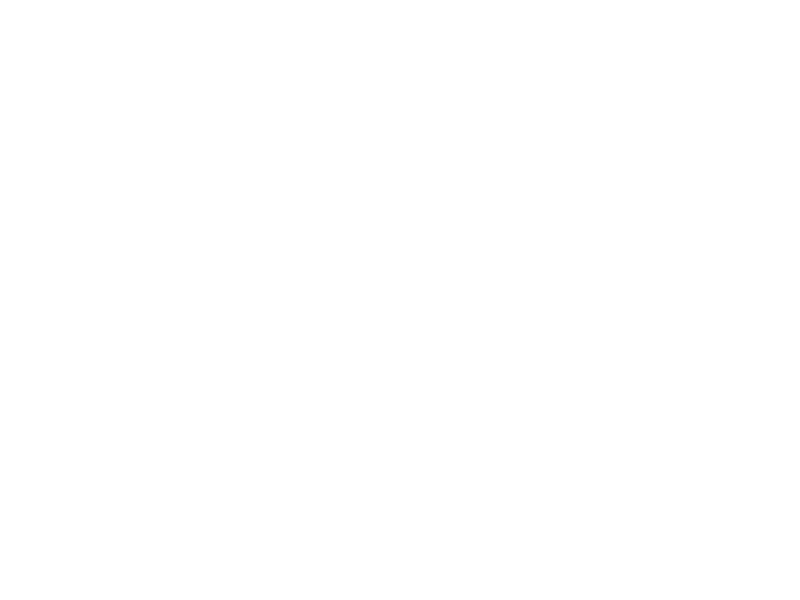

In [28]:
%matplotlib notebook
malla = (range(30) + 0 * np.ones(30)) / 10 
malla_x1 =  malla * (5) - (1)/2 + 0
malla_x2 =  malla * (5 - 1)/2 + 0
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)
zplot =xplot * model.params[0] + yplot *model.params[1]

plt3d = plt.figure('Plano Regresor', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(df['pc2'],df['pc3'],df['consume'])


I fent-ho polinomialment:

In [29]:
est = sm1.ols(formula='consume ~ I(pc5**2)+pc2+pc3+pc5+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     111.2
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.68e-66
Time:                        18:34:13   Log-Likelihood:                -292.76
No. Observations:                 310   AIC:                             597.5
Df Residuals:                     304   BIC:                             619.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1202      0.039     -3.080      

Ara provem a fer la regressió per al conjunt de dades amb el que previament em obtingut 0.68 $R^2$

In [30]:
train, test = train_test_split(df, test_size=0.2,random_state=6)

In [31]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ pc1+pc2+pc3+pc4+pc5+pc6+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     36.04
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.88e-36
Time:                        18:34:13   Log-Likelihood:                -305.10
No. Observations:                 310   AIC:                             626.2
Df Residuals:                     302   BIC:                             656.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0285      0.037     -0.762      0.4

Finalment obtenim:

In [32]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ pc2+pc3+pc5+pc6+pc7-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.456
Model:                            OLS   Adj. R-squared (uncentered):              0.447
Method:                 Least Squares   F-statistic:                              51.12
Date:                Thu, 25 Nov 2021   Prob (F-statistic):                    2.17e-38
Time:                        18:34:13   Log-Likelihood:                         -305.54
No. Observations:                 310   AIC:                                      621.1
Df Residuals:                     305   BIC:                                      639.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Fent-ho amb el model polinomic:
    

In [33]:
est = sm1.ols(formula='consume ~ I(pc3**2)+I(pc5**2)+pc2+pc3+pc5+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     61.25
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.96e-49
Time:                        18:34:13   Log-Likelihood:                -276.10
No. Observations:                 310   AIC:                             566.2
Df Residuals:                     303   BIC:                             592.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2417      0.048     -5.031      

<IPython.core.display.Javascript object>


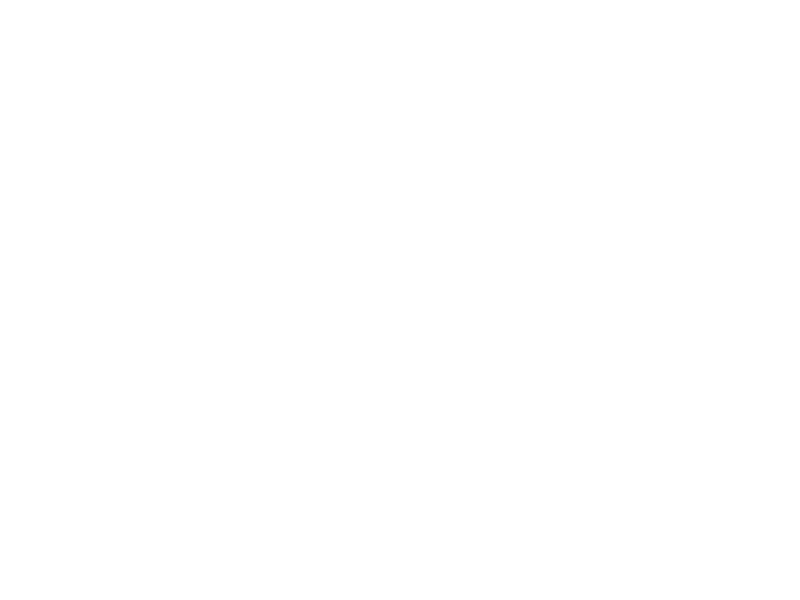

In [34]:
%matplotlib notebook
malla = (range(7) + 0 * np.ones(7)) / 10 
malla_x1 =  malla * (5) - (1)/2 + 0
malla_x2 =  malla * (5 - 1)/2 + 0
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)
zplot =model.params[0]+(xplot**2) * model.params[1]+xplot * model.params[4] + yplot *model.params[5]+ (yplot**2) *model.params[2]

plt3d = plt.figure('Plano Regresor', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(df['pc3'],df['pc5'],df['consume'])


In [35]:
##################gradient

In [36]:
class PolynomialRegressionGradDescent:
    def __init__(self, num_params, lr=.01, max_iter=10000, tolerance=1e-5,lambda_=0,deg=1):
        self.w = np.zeros((deg*num_params+1, 1))
        self.lr = lr
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.cost_list = []
        self.num_params= num_params
        self.lambda_=lambda_
        self.deg=deg
        
    def predict(self, x):
        prediction=np.dot(x,self.w[:self.num_params+1])
        for i in range(2,self.deg+1):
            prediction+=np.dot((x**i)[:,1:],self.w[(i-1)*self.num_params+1:i*self.num_params+1])
        return prediction
    
    def inference(self, x):
        x = np.hstack((np.ones((x.shape[0], 1)), x)) # añadimos un 1 a todas las muestras
        return self.predict(x)
    
    def compute_cost(self, x, y):
        samples = x.shape[0]
        preds = self.predict(x)
        
        error = preds - y
        #print(error)
        cost = 1/(2 * samples) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        
        return cost, error
    
    def update(self, x, error):
        samples = x.shape[0]
        self.w[:self.num_params+1]= self.w[:self.num_params+1] - (self.lr * (1/samples) * np.dot(x.T, error))-(self.lambda_*self.w[:self.num_params+1]/samples)
        for i in range(2,self.deg+1):
            self.w[(i-1)*self.num_params+1:i*self.num_params+1]= self.w[(i-1)*self.num_params+1:i*self.num_params+1] - (self.lr * (1/(samples)) * np.dot((x[:,1:]**i).T, error))-(self.lambda_*self.w[(i-1)*self.num_params+1:i*self.num_params+1]/samples)
        
        
    def fit(self, x, y):
        x = np.hstack((np.ones((x.shape[0], 1)), x)) # añadimos un 1 a todas las muestras
        old_cost = 1e9
        cost, _ = 0,0
        i = 0
        while i < self.max_iter and abs(old_cost - cost) > self.tolerance:
            i += 1
            old_cost=cost
            cost, error = self.compute_cost(x, y)
            self.update(x, error)
            self.cost_list.append(cost)
        

In [37]:
train, test = train_test_split(dataset, test_size=0.2,random_state=6)
x_train=train.drop(columns='consume').values
x_val=test.drop(columns='consume').values
y_train=train.filter(['consume']).values
y_val=test.filter(['consume']).values

In [38]:
lreg_gd = PolynomialRegressionGradDescent(9,lr=0.9718,deg=1)
lreg_gd.fit(x_train, y_train)
print(len(lreg_gd.cost_list), lreg_gd.cost_list[0],lreg_gd.cost_list[-1])
preds = lreg_gd.inference(x_val)

mse = mean_squared_error(y_val, preds)
r2 = r2_score(y_val, preds)
print(mse, r2)    

4081 [[0.38632193]] [[0.21964818]]
0.5224971771285354 0.7156171950390527


<IPython.core.display.Javascript object>


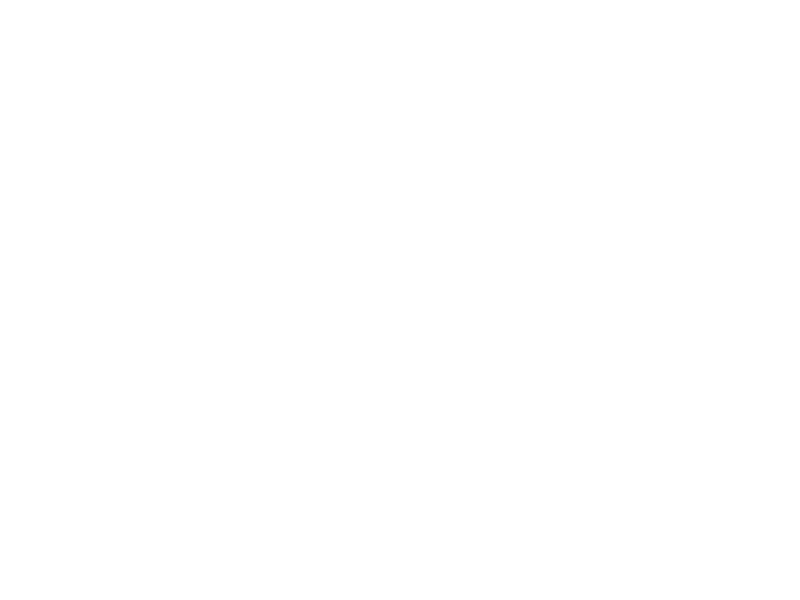

In [39]:
%matplotlib notebook
malla = (range(25) + 0 * np.ones(25)) / 10 
malla_x1 =  malla * (5) - (1)/2 + 0
malla_x2 =  malla * (5 - 1)/2 + 0
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)
zplot =lreg_gd.w[0][0]+xplot * lreg_gd.w[1][0] + yplot * lreg_gd.w[9][0]

plt3d = plt.figure('Plano Regresor', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(dataset['distance'],dataset['time'],dataset['consume'])


<IPython.core.display.Javascript object>


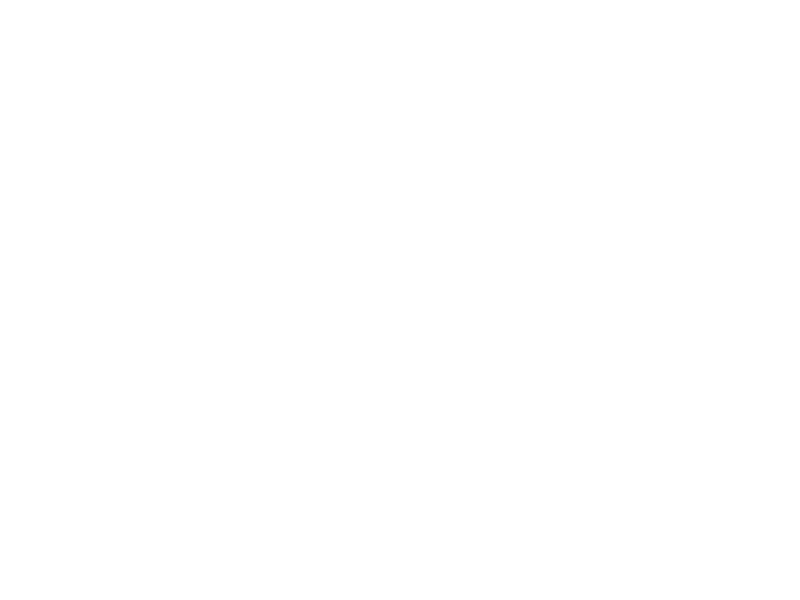

In [40]:
%matplotlib notebook
lamb_values = [x*.0001 for x in range(1,9725)]
accur_list = []

for lr_1 in lamb_values:
    prueba=PolynomialRegressionGradDescent(9,lr=lr_1,deg=1)
    prueba.fit(x_train, y_train)
    r2 = r2_score(y_val,prueba.inference(x_val)  )
    #print("  - Paràmetre lr igual a " + str(lr_1) + ":")
    #print("R2 score: %f" %(r2))
    accur_list.append(r2)

plt.plot(lamb_values[:len(accur_list)], accur_list)
plt.show()

In [41]:
lamb_values[np.argmax(np.array(accur_list))]

0.9718

In [42]:
max(accur_list)

0.7156171950390527

<IPython.core.display.Javascript object>


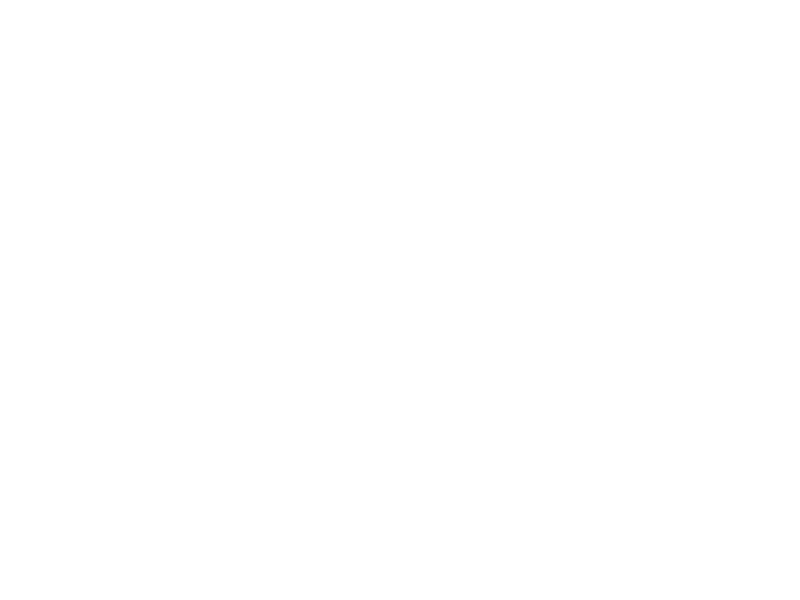

In [43]:
%matplotlib notebook
lamb_values = [x*.0001 for x in range(1,882)]
accur_list = []

for lr_1 in lamb_values:
    prueba=PolynomialRegressionGradDescent(9,lr=lr_1,deg=2)
    prueba.fit(x_train, y_train)
    r2 = r2_score(y_val,prueba.inference(x_val)  )
    #print("  - Paràmetre lr igual a " + str(lr_1) + ":")
    #print("R2 score: %f" %(r2))
    accur_list.append(r2)

plt.plot(lamb_values[:len(accur_list)], accur_list)
plt.show()

In [44]:
lamb_values[np.argmax(np.array(accur_list))]

0.08800000000000001

In [45]:
max(accur_list)

0.7342807179920421

In [46]:
lreg_gd = PolynomialRegressionGradDescent(9,lr=0.088,deg=2)
lreg_gd.fit(x_train, y_train)
print(len(lreg_gd.cost_list), lreg_gd.cost_list[0],lreg_gd.cost_list[-1])
preds = lreg_gd.inference(x_val)

mse = mean_squared_error(y_val, preds)
r2 = r2_score(y_val, preds)
print(mse, r2)    

1519 [[0.38632193]] [[0.16661503]]
0.48820664377667955 0.7342807179920365


<IPython.core.display.Javascript object>


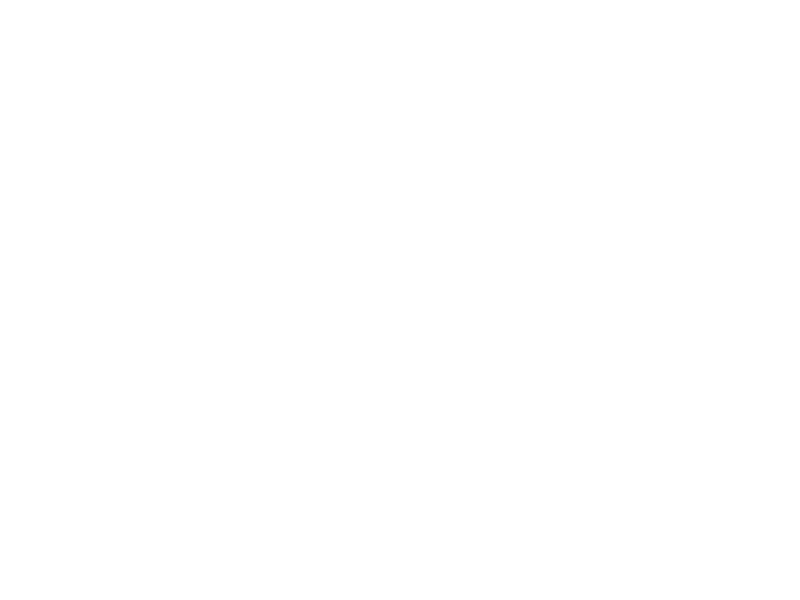

In [47]:
%matplotlib notebook
malla = (range(30) + 0 * np.ones(30)) / 10 
malla_x1 =  malla * (8) - (1)/2 + 0
malla_x2 =  malla * (5 - 1)/2 + 0
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)
zplot =lreg_gd.w[0][0]+xplot * lreg_gd.w[1][0]+(xplot**2) * lreg_gd.w[10][0] + yplot * lreg_gd.w[9][0]+(yplot**2) * lreg_gd.w[18][0]

plt3d = plt.figure('Plano Regresor', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(dataset['distance'],dataset['time'],dataset['consume'])


<IPython.core.display.Javascript object>


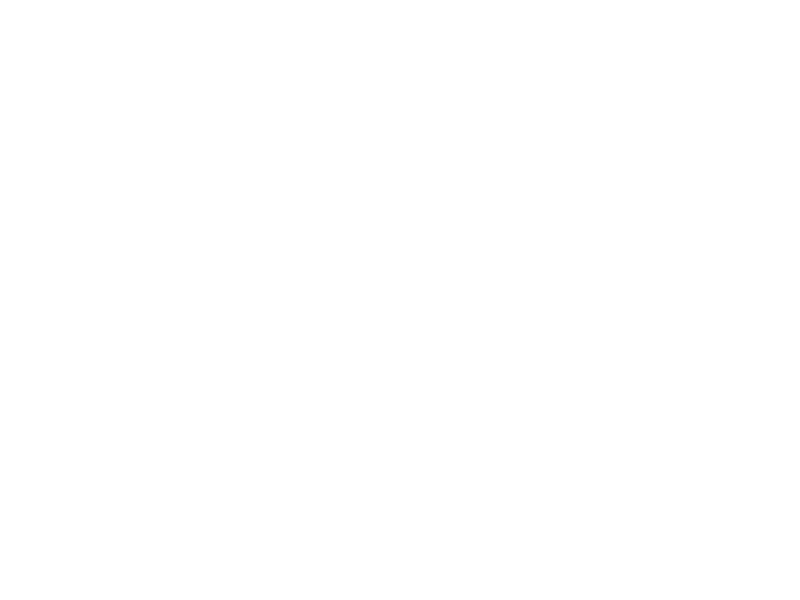

In [48]:
%matplotlib notebook
lamb_values = [x*.0001 for x in range(1,44)]
accur_list = []

for lr_1 in lamb_values:
    prueba=PolynomialRegressionGradDescent(9,lr=lr_1,deg=3)
    prueba.fit(x_train, y_train)
    r2 = r2_score(y_val,prueba.inference(x_val)  )
    accur_list.append(r2)

plt.plot(lamb_values[:len(accur_list)], accur_list)
plt.show()

In [49]:
lamb_values[np.argmax(np.array(accur_list))]

0.0008

In [50]:
max(accur_list)

0.6942342565229249

In [51]:
lreg_gd = PolynomialRegressionGradDescent(9,lr=0.0008,deg=3)
lreg_gd.fit(x_train, y_train)
print(len(lreg_gd.cost_list), lreg_gd.cost_list[0],lreg_gd.cost_list[-1])
preds = lreg_gd.inference(x_val)

mse = mean_squared_error(y_val, preds)
r2 = r2_score(y_val, preds)
print(mse, r2)    

2083 [[0.38632193]] [[0.17058966]]
0.5617840989061164 0.6942342565229249


<IPython.core.display.Javascript object>


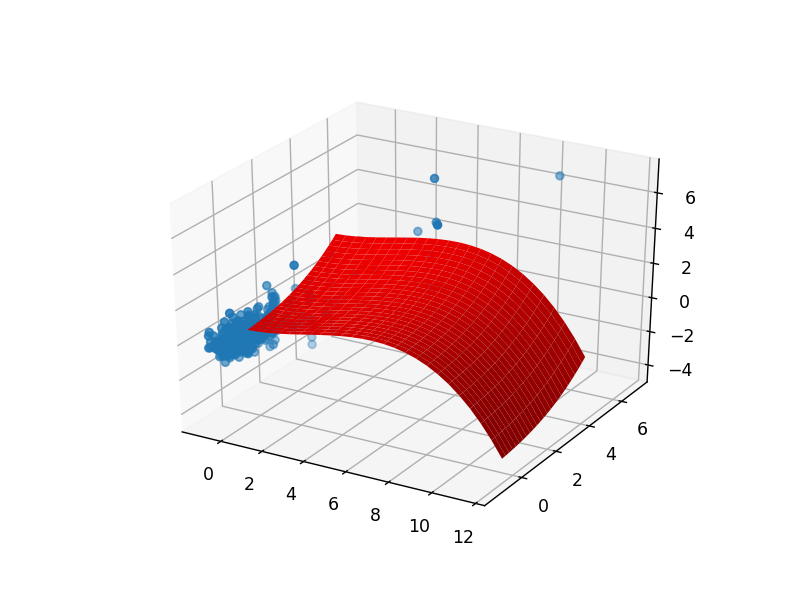

In [52]:
%matplotlib notebook
malla = (range(25) + 0 * np.ones(25)) / 10 
malla_x1 =  malla * (5) - (1)/2 + 0
malla_x2 =  malla * (5 - 1)/2 + 0
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)
zplot =lreg_gd.w[0][0]+xplot * lreg_gd.w[1][0]+(xplot**2) * lreg_gd.w[10][0]+ (xplot**3) * lreg_gd.w[19][0]+ yplot * lreg_gd.w[9][0]+(yplot**2) * lreg_gd.w[18][0]+(yplot**3) * lreg_gd.w[27][0]

plt3d = plt.figure('Plano Regresor', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(dataset['distance'],dataset['time'],dataset['consume'])


In [ ]:

..